In [1]:
import env
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from sklearn.cluster import KMeans

In [2]:
iris_df = data("iris")

## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

* Choose features other than the ones used in the lesson.
* Visualize the results of your clustering.
* Use the elbow method to visually select a good value for k.
* Repeat the clustering, this time with 3 different features.

In [3]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df = iris_df.rename(columns={'Sepal.Length' : 'sepal_length', 'Sepal.Width' : 'sepal_width', 'Petal.Length' : 'petal_length', 'Petal.Width' : 'petal_width', 'Species' : 'species'})
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
X = iris_df[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

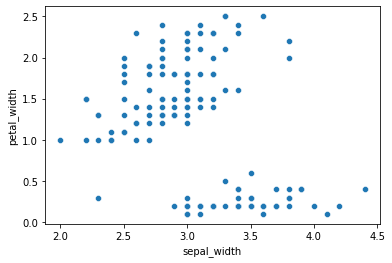

In [6]:
sns.scatterplot(x=X.sepal_width, y=X.petal_width)

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris_df['cluster'] = kmeans.predict(X)
iris_df.sample(14)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
59,6.6,2.9,4.6,1.3,versicolor,0
88,6.3,2.3,4.4,1.3,versicolor,0
124,6.3,2.7,4.9,1.8,virginica,2
38,4.9,3.6,1.4,0.1,setosa,1
36,5.0,3.2,1.2,0.2,setosa,1
103,7.1,3.0,5.9,2.1,virginica,2
25,4.8,3.4,1.9,0.2,setosa,1
9,4.4,2.9,1.4,0.2,setosa,1
97,5.7,2.9,4.2,1.3,versicolor,0
19,5.7,3.8,1.7,0.3,setosa,1


In [8]:
iris_df.cluster = "cluster_" + iris_df.cluster.astype(str)

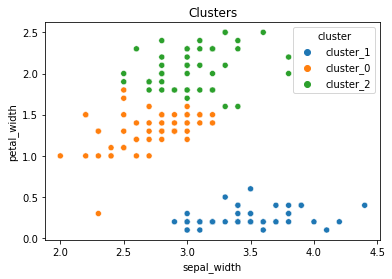

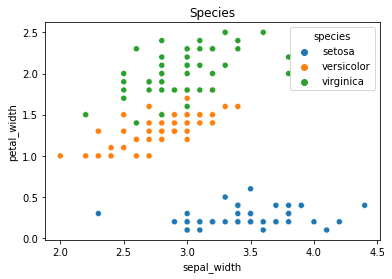

In [9]:
sns.scatterplot(x='sepal_width', y='petal_width', hue='cluster', data=iris_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=iris_df)
plt.title("Species")
plt.show()

In [11]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width
0,2.707547,1.309434
1,3.451020,0.244898
2,3.041667,2.052083


In [12]:
iris_df.groupby('cluster')['sepal_width', 'petal_width'].mean()

,sepal_width,petal_width
cluster,,
cluster_0,2.707547,1.309434
cluster_1,3.451020,0.244898
cluster_2,3.041667,2.052083


Text(0.5, 1.0, 'Visualizing Cluster Centers')

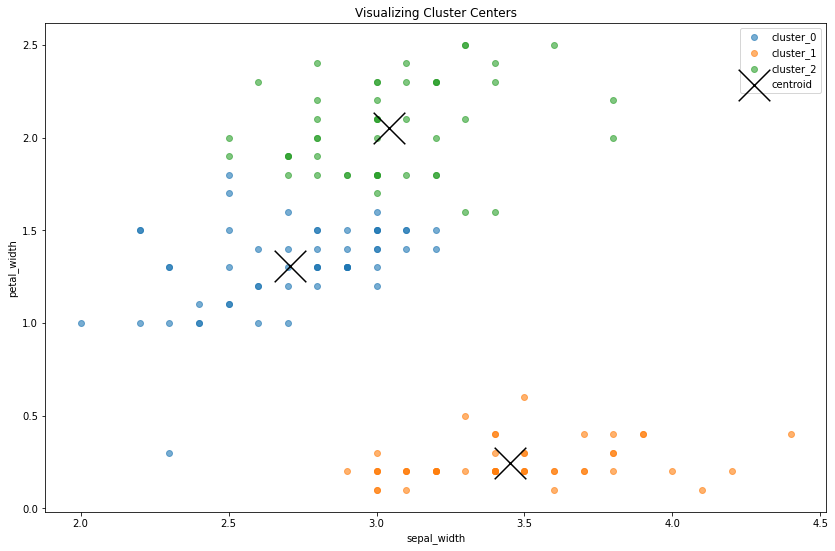

In [15]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label=cluster, alpha=.6)
    
centroids.plot.scatter(x='sepal_width', y='petal_width', c="black", marker="x", s=1000, ax=plt.gca(), label="centroid")

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [17]:
iris_df['cluster_n2'] = kmeans.predict(X)
iris_df['cluster_n2'] = "cluster_" + iris_df.cluster_n2.astype(str)

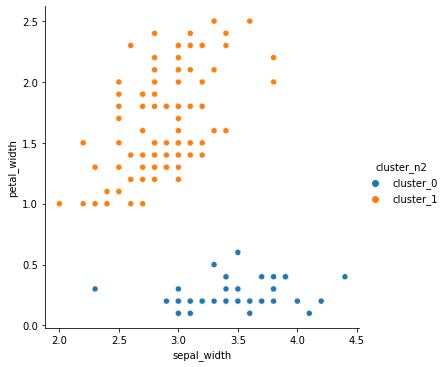

In [18]:
sns.relplot(x='sepal_width', y='petal_width', hue='cluster_n2', data=iris_df)

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [20]:
iris_df['cluster_n5'] = kmeans.predict(X)
iris_df['cluster_n5'] = "cluster_" + iris_df.cluster_n5.astype(str)

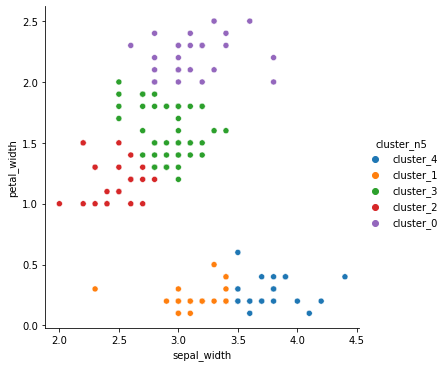

In [21]:
sns.relplot(x='sepal_width', y='petal_width', hue='cluster_n5', data=iris_df)

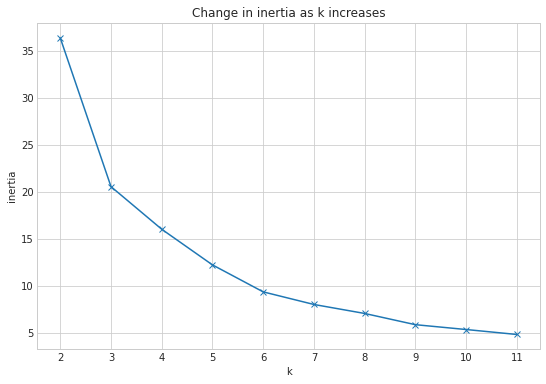

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

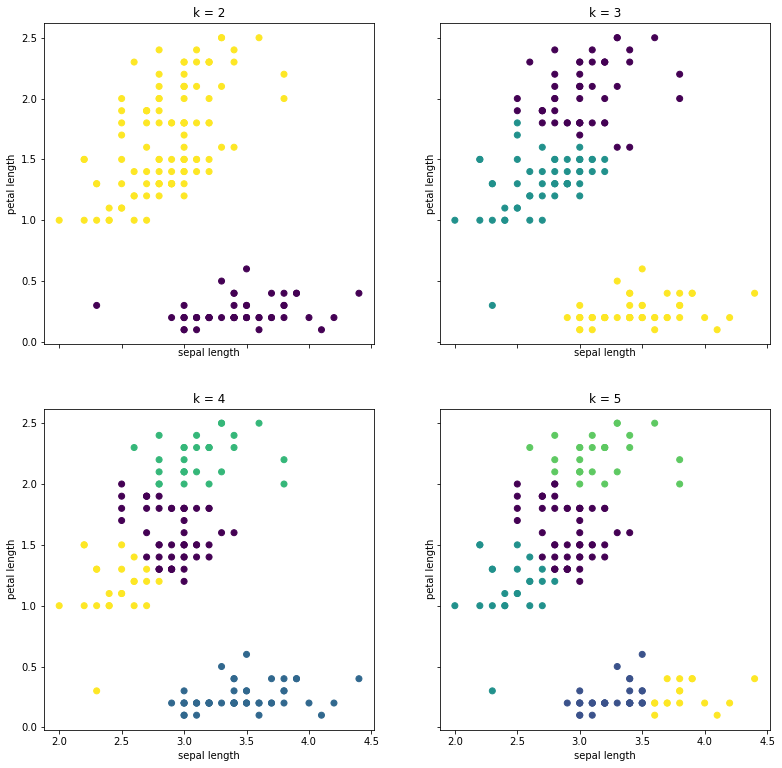

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

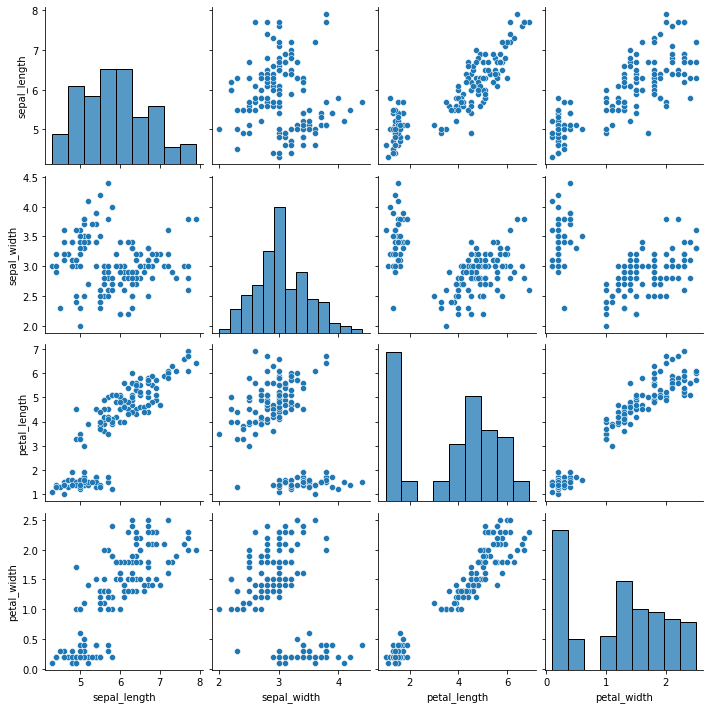

In [26]:
sns.pairplot(iris_df)

In [28]:
X_2 = iris_df[['sepal_width', 'sepal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_2)

iris_df['cluster_n3'] = kmeans.predict(X_2)
iris_df['cluster_n3'] = "cluster_" + iris_df.cluster_n3.astype(str)

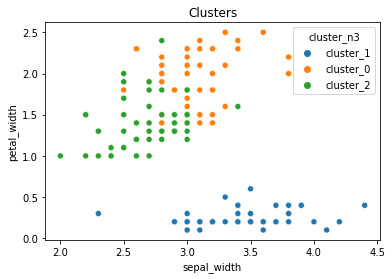

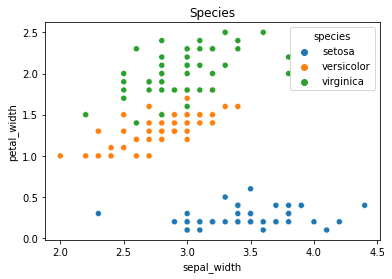

In [29]:
sns.scatterplot(x='sepal_width', y='petal_width', hue='cluster_n3', data=iris_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=iris_df)
plt.title("Species")
plt.show()

Text(0.5, 1.0, 'Visualizing Cluster Centers')

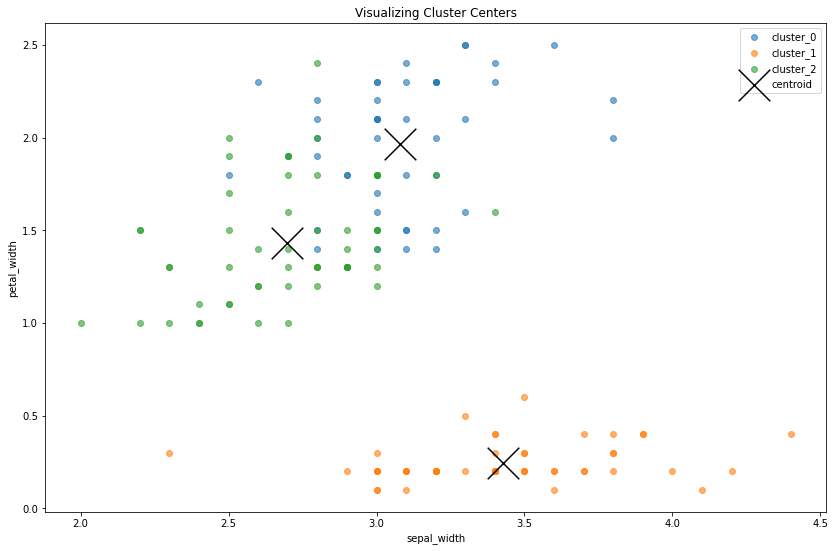

In [34]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_2.columns)

plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster_n3'):
    plt.scatter(subset.sepal_width, subset.petal_width, label=cluster, alpha=.6)
    
centroids.plot.scatter(x='sepal_width', y='petal_width', c="black", marker="x", s=1000, ax=plt.gca(), label="centroid")

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

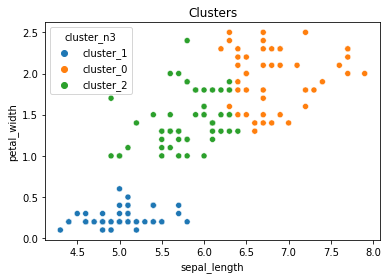

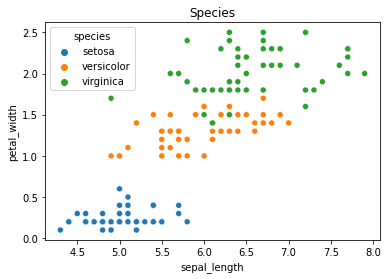

In [31]:
sns.scatterplot(x='sepal_length', y='petal_width', hue='cluster_n3', data=iris_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=iris_df)
plt.title("Species")
plt.show()

Text(0.5, 1.0, 'Visualizing Cluster Centers')

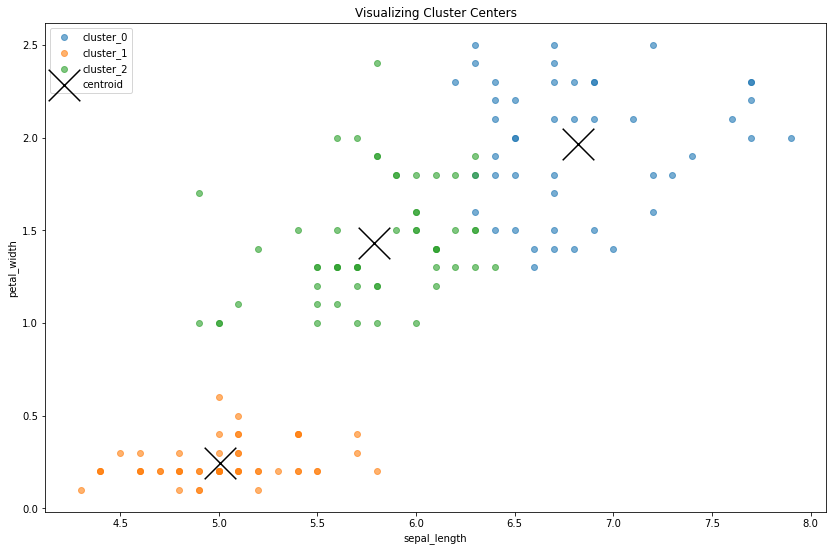

In [35]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster_n3'):
    plt.scatter(subset.sepal_length, subset.petal_width, label=cluster, alpha=.6)
    
centroids.plot.scatter(x='sepal_length', y='petal_width', c="black", marker="x", s=1000, ax=plt.gca(), label="centroid")

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

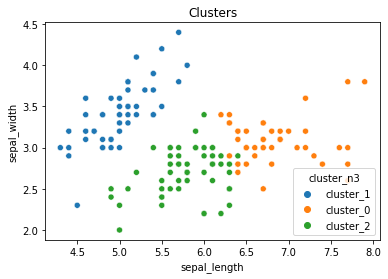

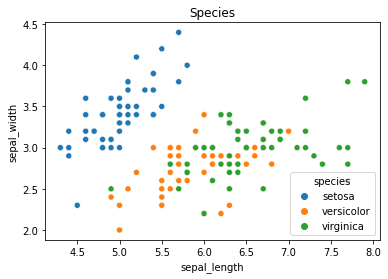

In [36]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster_n3', data=iris_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_df)
plt.title("Species")
plt.show()

Text(0.5, 1.0, 'Visualizing Cluster Centers')

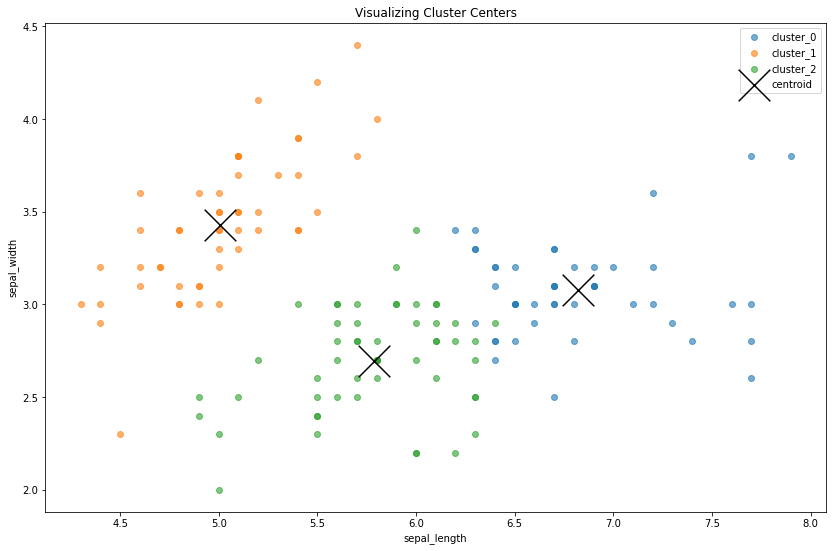

In [37]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster_n3'):
    plt.scatter(subset.sepal_length, subset.sepal_width, label=cluster, alpha=.6)
    
centroids.plot.scatter(x='sepal_length', y='sepal_width', c="black", marker="x", s=1000, ax=plt.gca(), label="centroid")

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Visualizing Cluster Centers')

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

## 3. How does scaling impact the results of clustering?
Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.